start loading close_N, db_type is:h5, pleae wait ...
<class 'numpy.ndarray'>
(2360, 9)
2360
9
start generating performance ...
start loading close_F, db_type is:h5, pleae wait ...
start loading vwap_F, db_type is:h5, pleae wait ...
start loading pct_chg, db_type is:h5, pleae wait ...
start loading high_N, db_type is:h5, pleae wait ...
start loading low_N, db_type is:h5, pleae wait ...
start loading trade_status_sig, db_type is:h5, pleae wait ...
proceeding ...
performance saving ...
proceeding ...

                        Sharpe       Return  MaxDrawdown     Turnover
20100105-20101231       -0.611       -13.83       -30.70         24.1
20110104-20111230       -2.723       -47.14       -62.50         28.5
20120104-20121231       -0.383        -9.14       -85.32         24.4
20130104-20131231        0.109         3.07       -50.56         22.3
20140102-20141231        1.499        39.65       -70.69         24.1
20150105-20151231        1.643        60.80       -28.87         19.5
201601

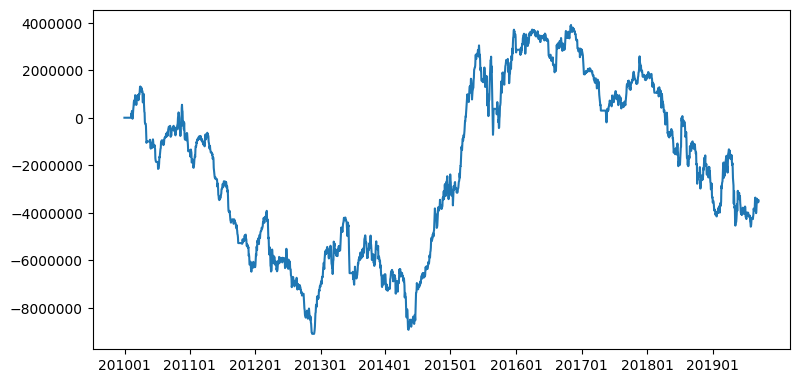

In [2]:
# -*- coding: utf-8 -*-      
from JuRunPlatform import StrategyPlatform

#
import pandas as pd

# 平台初始化（必须）
sp = StrategyPlatform()

# 设置要回测的品种（必须）
sp.SetStockList("000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ".split(','))
# sp.SetStockList(['000001.SZ', '000002.SZ', '603997.SH', '603998.SH', '603999.SH'])
# 或者
# sp.SetStockListByCSVFile('StockCodes2839.csv')

# 要操作的日期（必须）
sp.SetDate(20100104, 20190915)

# 策略begin
cps = sp.LoadData('close_N')

# ma5cps = pd.rolling_mean(cps, 5)
ma5cps = pd.DataFrame(cps).rolling(5).mean()
ma5cps = ma5cps.to_numpy()
# ma20cps = pd.rolling_mean(cps, 20)
ma20cps = pd.DataFrame(cps).rolling(20).mean()
ma20cps = ma20cps.to_numpy()

#
alpha = sp.LoadZeroAlpha()
print((type(alpha)))
print((alpha.shape))
print((len(alpha)))
print((len(alpha[0])))

#
for i in range(1, len(alpha)):
    for j in range(len(alpha[0])):
        if ma5cps[i - 1, j] > ma20cps[i - 1, j]:
            alpha[i, j] = 1

# 策略end

# 保存Performance
sp.GeneratePerformance(alpha, savePerformance=True)

In [4]:
# -*- coding: utf-8 -*-      
from JuRunPlatform import StrategyPlatform

#
import pandas as pd

# 平台初始化（必须）
sp = StrategyPlatform()

# 设置要回测的品种（必须）
sp.SetStockList("IC00C1.CFE,IC00C2.CFE,IC00C3.CFE,IC00C4.CFE".split(','))  # 期货连续


# 要操作的日期（必须）
sp.SetDate(20100104, 20190915)

# 策略begin
cps = sp.LoadData('close_N')
cps

start loading close_N, db_type is:h5, pleae wait ...


array([[   nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan],
       ...,
       [5218. , 5182.6, 5122.2, 5037.4],
       [5240.2, 5213. , 5153.4, 5072.8],
       [5240.2, 5213. , 5153.4, 5072.8]])

In [6]:
# -*- coding: utf-8 -*-      
from JuRunPlatform import StrategyPlatform

#
import pandas as pd

# 平台初始化（必须）
sp = StrategyPlatform()

# 日指标
daily_factor = sp.ShowAllDailyFactors()
daily_factor

,Name,Description
0,open_N,开盘价(不复权)
1,close_N,收盘价(不复权)
2,high_N,最高价(不复权)
3,low_N,最低价(不复权)
4,total_shares,总股本
5,float_a_shares,A股流通量
6,pb,
7,mkt_cap_ashare,A股市值(不含限售股)
8,mkt_cap_ashare2,A股市值(含限售股)
9,amt,成交额


In [7]:
# -*- coding: utf-8 -*-      
from JuRunPlatform import StrategyPlatform

#
import pandas as pd

# 平台初始化（必须）
sp = StrategyPlatform()

# 日指标
daily_factor = sp.ShowAllQuarterFactors()
daily_factor

,Name,Description
0,qfa_eps,单季度每股收益EPS
1,qfa_roe,单季度.净资产收益率ROE
2,qfa_roa,单季度.总资产净利率ROA
3,qfa_yoysales,单季度营业收入同比增长率
4,qfa_yoyprofit,单季度净利润同比增长率
